# Atividade 03
Bianca Bonetti Nunes

### Importando a série temporal de interesse

In [97]:
# Importanto pacotes
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [79]:
#importando a planilha com dados
cwd = os.getcwd()
path = cwd+'\\Dados\\ES_planilhacompleta.csv'
print(path)
data = pd.read_csv(path,encoding='latin-1')
data.head()

C:\Users\BiaBN\OneDrive\Documentos\ENS410064\Dados\ES_planilhacompleta.csv


C:\Users\BiaBN\AppData\Local\Temp\ipykernel_7364\3387021123.py:5: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(path,encoding='latin-1')


,Ano,Mes,Dia,Hora,Minuto,Estacao,Estacao.1,Poluente,Valor,Unidade,Tipo,Testacao
0,2023,1,1,0,30,Laranjeiras,ES_001,O3,29.89,ug/m3,Automatica,Referencia
1,2023,1,1,1,30,Laranjeiras,ES_001,O3,26.2,ug/m3,Automatica,Referencia
2,2023,1,1,2,30,Laranjeiras,ES_001,O3,20.27,ug/m3,Automatica,Referencia
3,2023,1,1,3,30,Laranjeiras,ES_001,O3,23.22,ug/m3,Automatica,Referencia
4,2023,1,1,4,30,Laranjeiras,ES_001,O3,21.53,ug/m3,Automatica,Referencia


### Filtrando os dados de uma só estação - A estação escolhida foi ES_001

In [80]:
laranjeiras = data.loc[(data['Estacao.1'] == 'ES_008')]  # Filtrando apenas a estação ES_001
laranjeiras.head()
#transformando a coluna Valor em float
laranjeiras['Valor'] = laranjeiras['Valor'].astype('float')
laranjeiras.dtypes

C:\Users\BiaBN\AppData\Local\Temp\ipykernel_7364\1158708167.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  laranjeiras['Valor'] = laranjeiras['Valor'].astype('float')


Ano            int64
Mes            int64
Dia            int64
Hora           int64
Minuto         int64
Estacao       object
Estacao.1     object
Poluente      object
Valor        float64
Unidade       object
Tipo          object
Testacao      object
dtype: object

In [81]:
#checando se existem dados faltantes
print(np.sum(data.iloc[:].isna()))

Ano               0
Mes               0
Dia               0
Hora              0
Minuto            0
Estacao           0
Estacao.1         0
Poluente          0
Valor        182161
Unidade           0
Tipo              0
Testacao          0
dtype: int64


c:\users\biabn\onedrive\documentos\ens410064\pyenv\lib\site-packages\numpy\_core\fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


In [82]:
#Criando um datetime
laranjeiras['datetime'] = pd.to_datetime(laranjeiras[['Ano', 'Mes', 'Dia', 'Hora', 'Minuto']].astype(str).agg('-'.join,axis =1), format = '%Y-%m-%d-%H-%M')
laranjeiras = laranjeiras.set_index("datetime")
laranjeiras.head()

C:\Users\BiaBN\AppData\Local\Temp\ipykernel_7364\3116621975.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  laranjeiras['datetime'] = pd.to_datetime(laranjeiras[['Ano', 'Mes', 'Dia', 'Hora', 'Minuto']].astype(str).agg('-'.join,axis =1), format = '%Y-%m-%d-%H-%M')


,Ano,Mes,Dia,Hora,Minuto,Estacao,Estacao.1,Poluente,Valor,Unidade,Tipo,Testacao
datetime,,,,,,,,,,,,
2023-01-01 00:30:00,2023,1,1,0,30,Ibes,ES_008,MP25,NaN,ug/m3,Automatica,Referencia
2023-01-01 01:30:00,2023,1,1,1,30,Ibes,ES_008,MP25,NaN,ug/m3,Automatica,Referencia
2023-01-01 02:30:00,2023,1,1,2,30,Ibes,ES_008,MP25,NaN,ug/m3,Automatica,Referencia
2023-01-01 03:30:00,2023,1,1,3,30,Ibes,ES_008,MP25,NaN,ug/m3,Automatica,Referencia
2023-01-01 04:30:00,2023,1,1,4,30,Ibes,ES_008,MP25,NaN,ug/m3,Automatica,Referencia


In [83]:
# Selecionando somente os dados importantes para minha análise
laranjeiras = laranjeiras[['Poluente','Valor', 'Unidade', 'Tipo', 'Testacao']]
laranjeiras

,Poluente,Valor,Unidade,Tipo,Testacao
datetime,,,,,
2023-01-01 00:30:00,MP25,NaN,ug/m3,Automatica,Referencia
2023-01-01 01:30:00,MP25,NaN,ug/m3,Automatica,Referencia
2023-01-01 02:30:00,MP25,NaN,ug/m3,Automatica,Referencia
2023-01-01 03:30:00,MP25,NaN,ug/m3,Automatica,Referencia
2023-01-01 04:30:00,MP25,NaN,ug/m3,Automatica,Referencia
...,...,...,...,...,...
2023-12-31 19:30:00,CO,556.56,ug/m3,Automatica,Referencia
2023-12-31 20:30:00,CO,708.49,ug/m3,Automatica,Referencia
2023-12-31 21:30:00,CO,608.05,ug/m3,Automatica,Referencia


### Fazendo graficos de linha para cada poluente


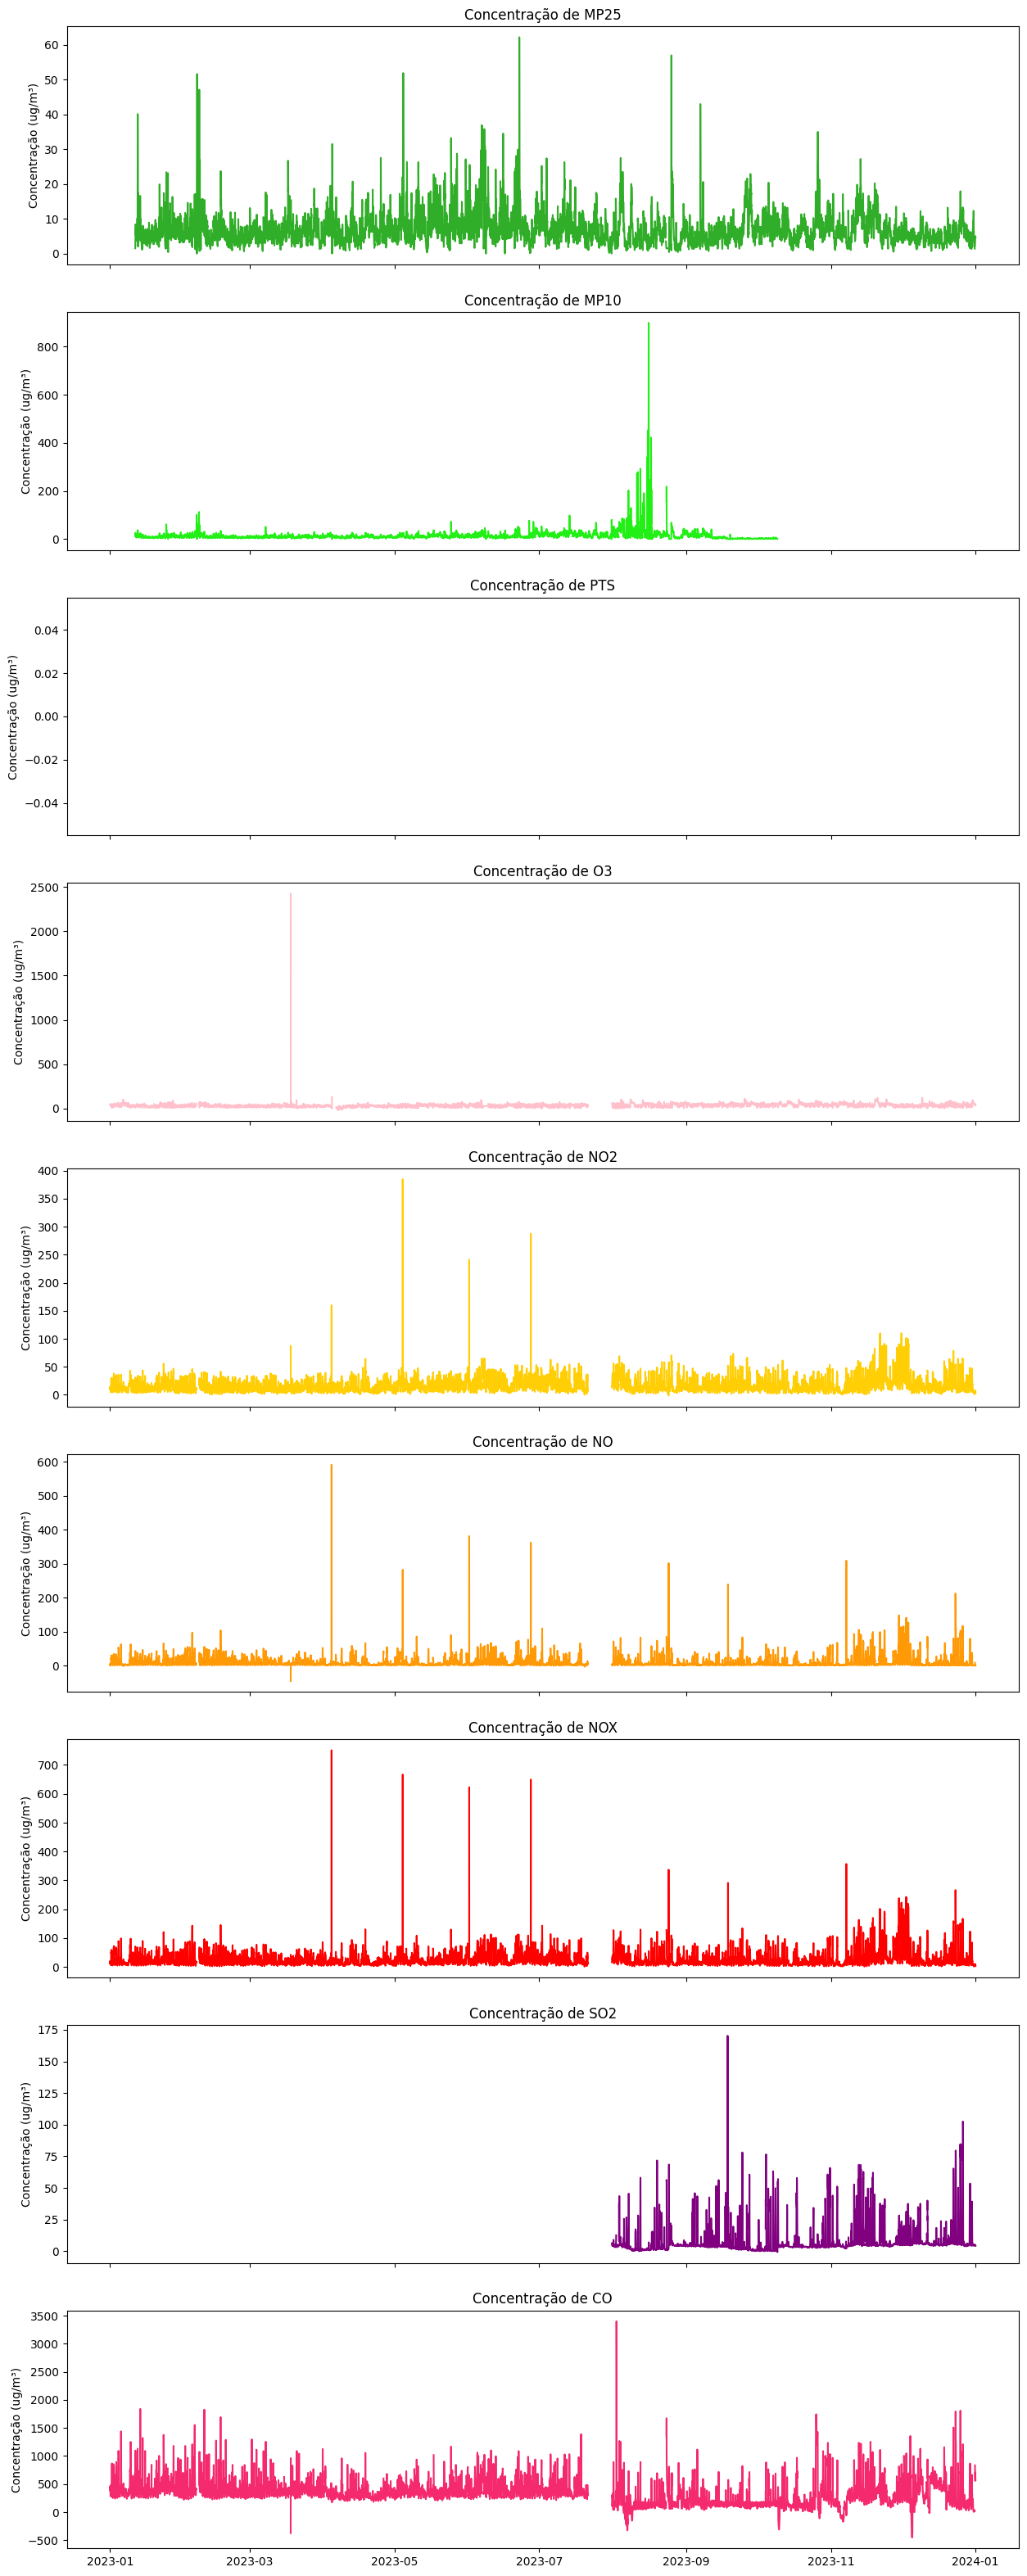

In [89]:
poluentes = laranjeiras['Poluente'].unique().tolist()

colors = ['#31ae29', '#22ef15', 'blue', 'pink', '#ffce05', '#ff9905', 'red', 'purple', '#f5296e']
limites = []
fig,ax = plt.subplots(9,sharex=True, figsize = (15,40))
ii = 0
for polu in poluentes:
    df_poluente = laranjeiras.loc[(laranjeiras['Poluente'] == polu)]
    ax[ii].plot(df_poluente.index,df_poluente['Valor'],color = colors[ii])
    label_limite = 'Limite de '+polu
    #ax[ii].axhline(y= limites[ii], color= colors[ii], linestyle='--', label=label_limite)
    ax[ii].set_title('Concentração de '+polu)
    ax[ii].set_ylabel('Concentração (ug/m³)')
    ii = ii+1
  
      

### Fazendo Gráficos das Médias Diárias

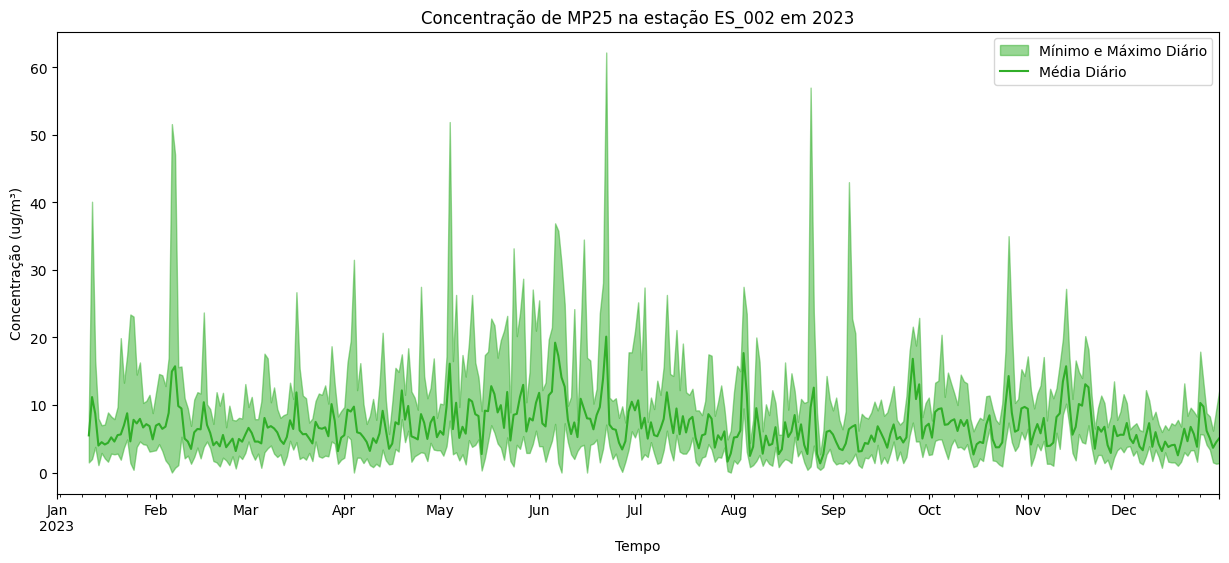

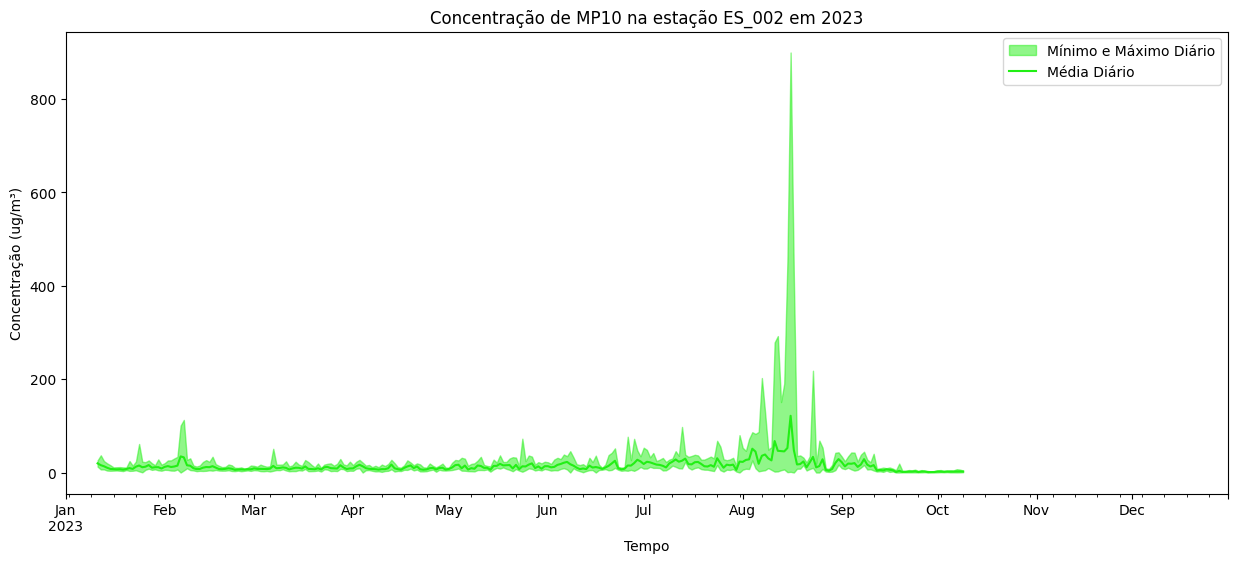

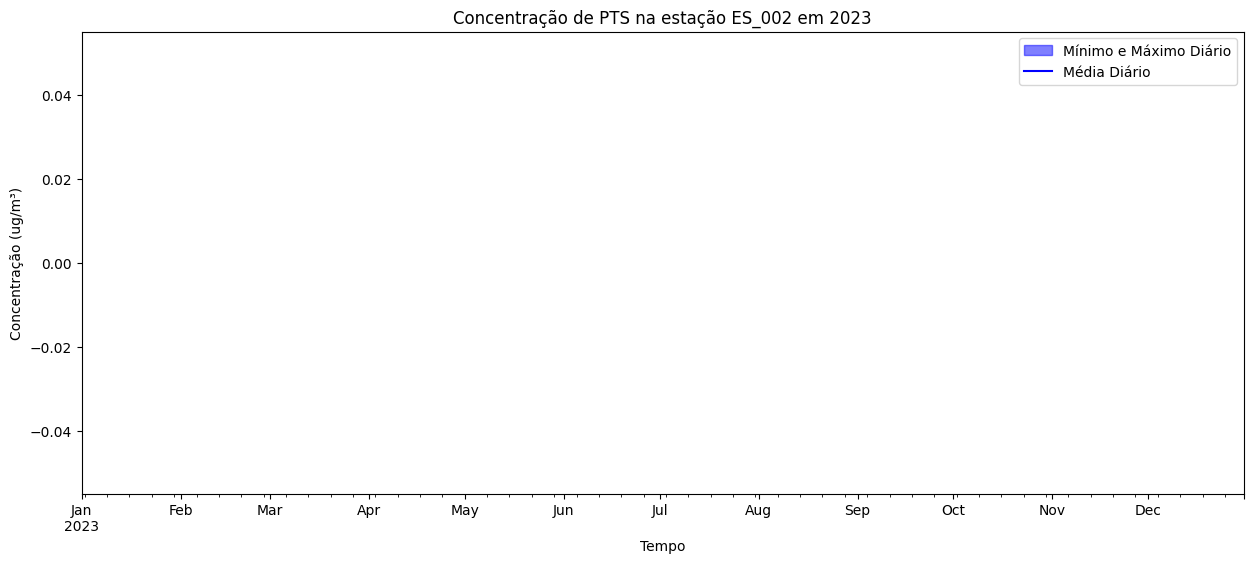

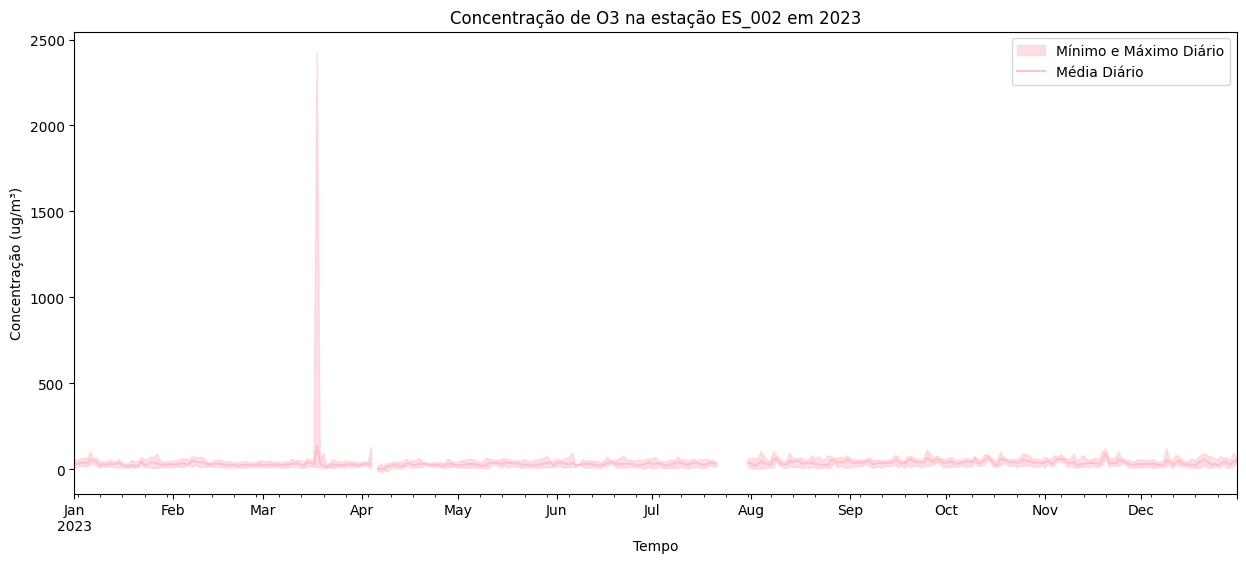

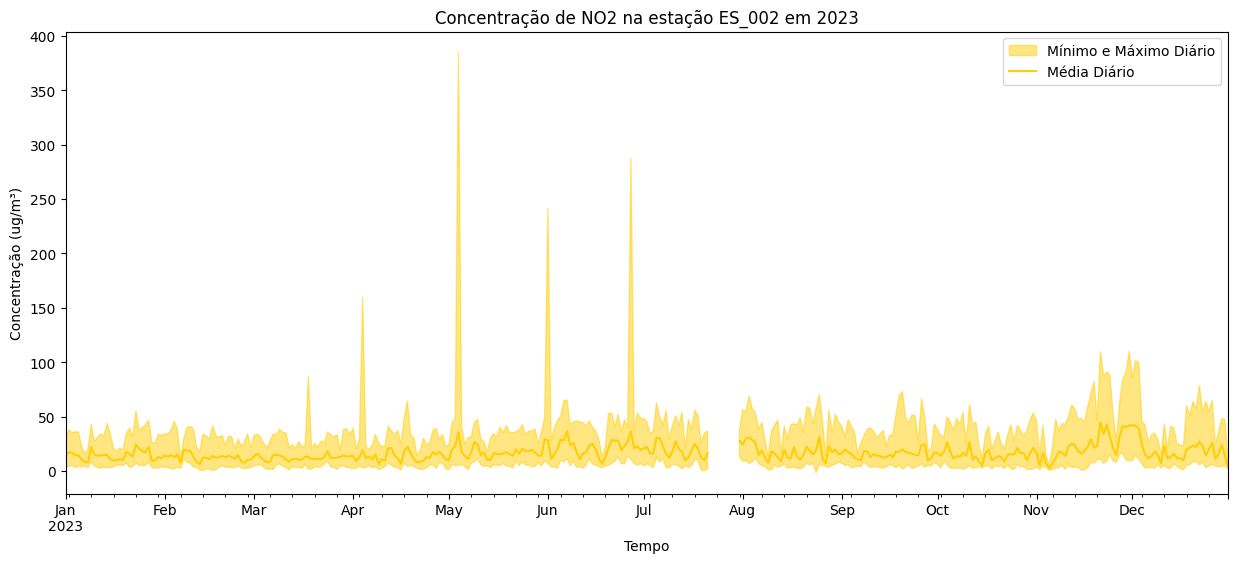

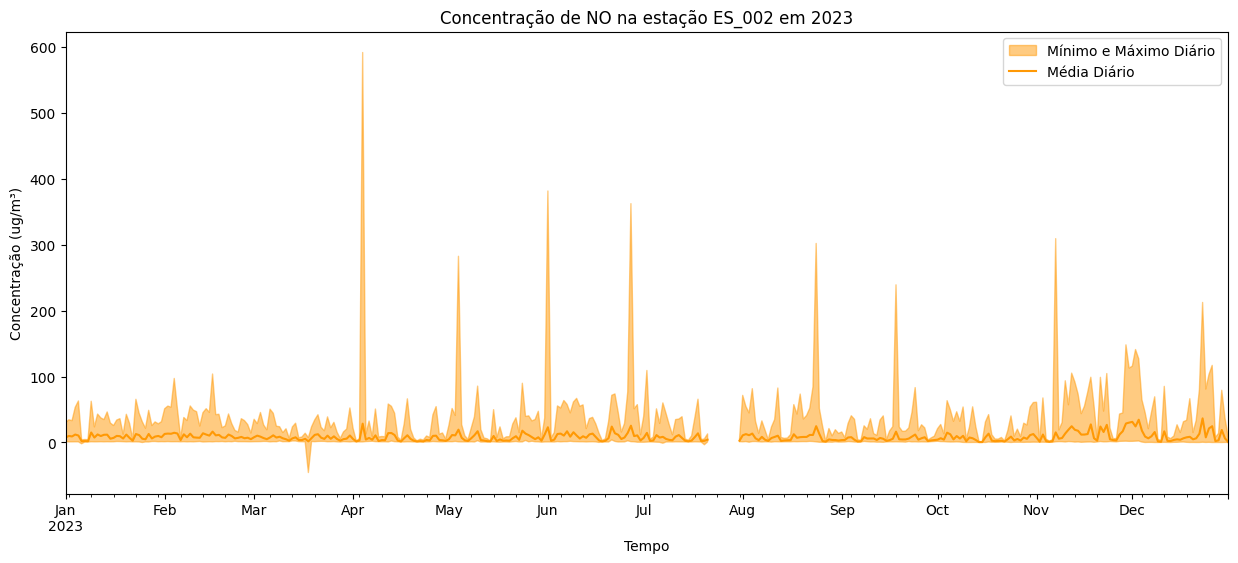

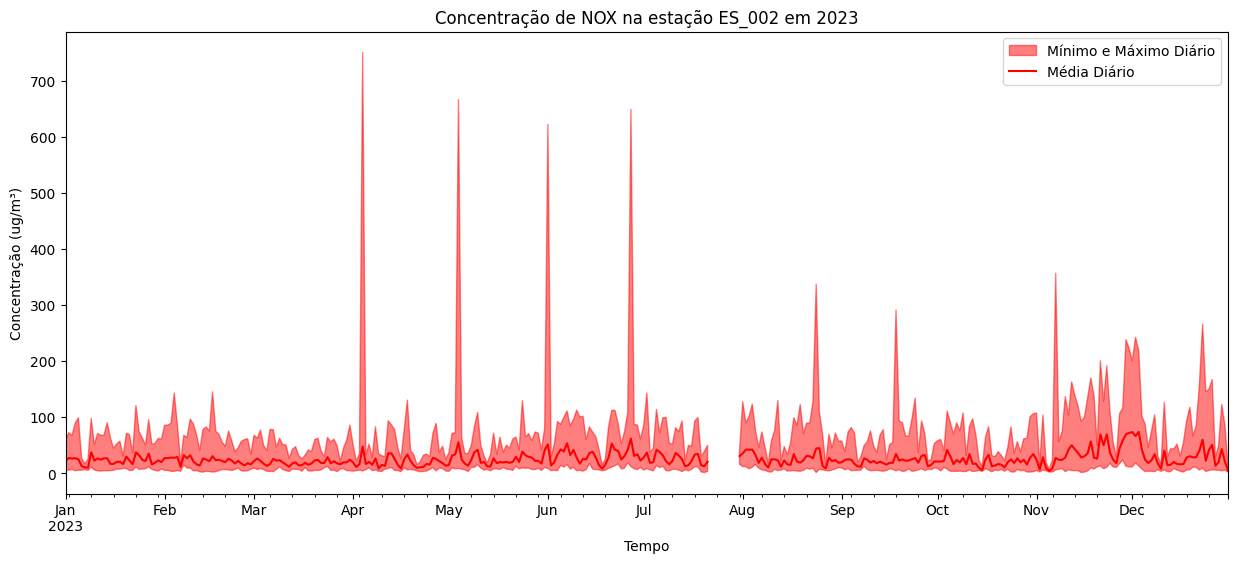

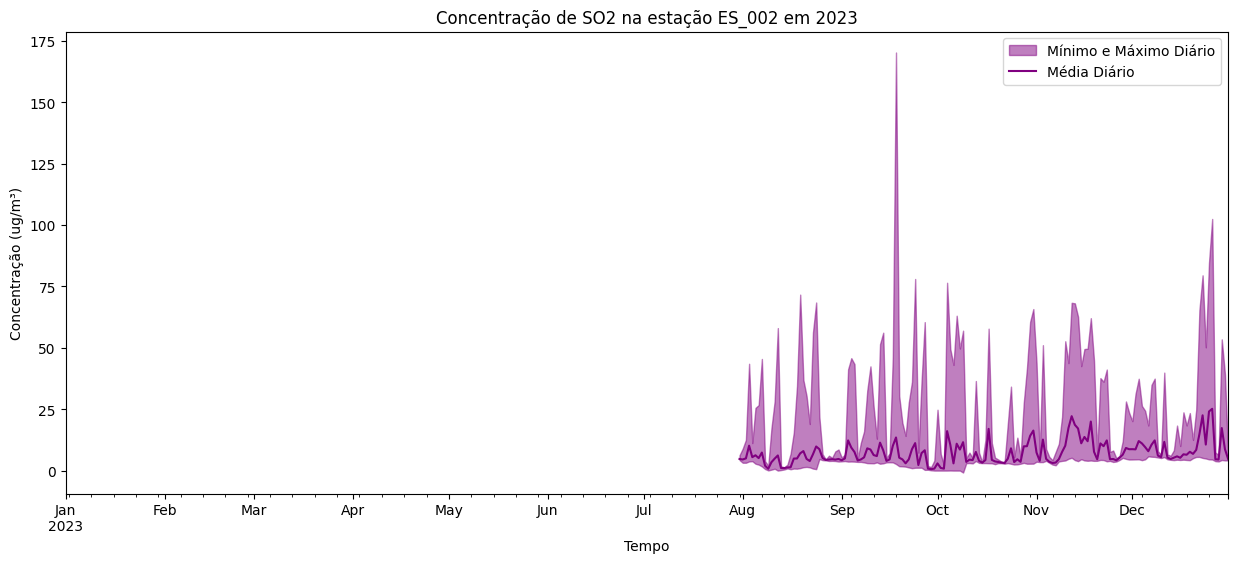

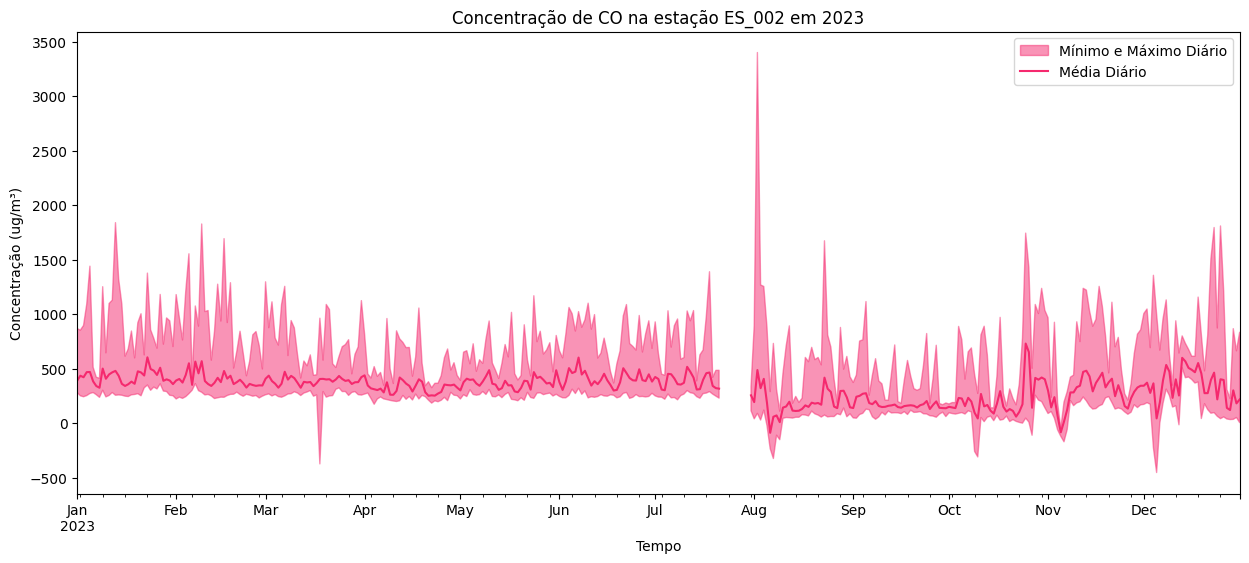

In [93]:
jj=0
for polu in poluentes:    
    # Calcula a média, mínima e máxima diária
    df_poluente = laranjeiras.loc[(laranjeiras['Poluente'] == polu)]
    media_diaria_poluente = df_poluente['Valor'].resample('D').mean()  #Resample('D'),reamostrar os dados em uma base diária e calculua a media
    min_diaria_poluente = df_poluente['Valor'].resample('D').min()
    max_diaria_poluente = df_poluente['Valor'].resample('D').max()
    
    plt.figure(figsize=(15, 6))
    
    # Área sombreada entre os valores mínimo e máximo
    plt.fill_between(min_diaria_poluente.index, min_diaria_poluente, max_diaria_poluente, color=colors[jj], alpha=0.5, label='Mínimo e Máximo Diário')
    
    # Plota a média diária
    media_diaria_poluente.plot(color=colors[jj], legend=True, label='Média Diário')
    
    plt.xlabel('Tempo')
    plt.ylabel('Concentração (ug/m³)')
    plt.title('Concentração de '+polu+' na estação ES_002 em 2023')
    plt.legend()
    plt.show()
    jj=jj+1

In [ ]:
### Plotando Gráficos Boxsplot

TypeError: Data source must be a DataFrame or Mapping, not <class 'pandas.core.series.Series'>.

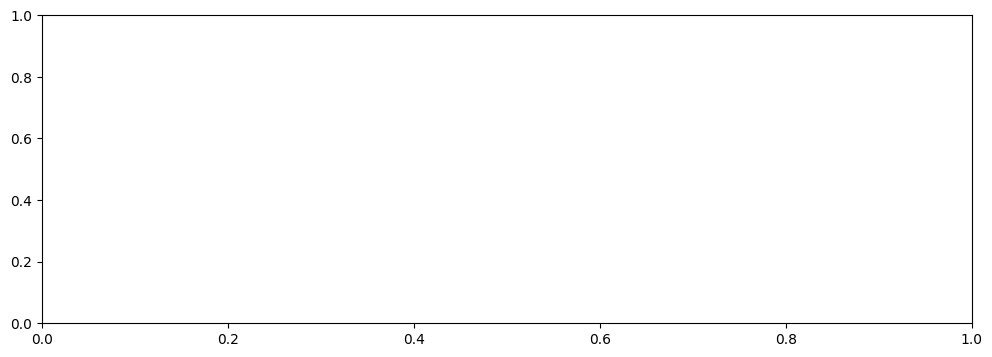

In [98]:
fig,ax = plt.subplots(figsize = (12,4))
ii = 0
for polu in poluentes:
    df_poluente = laranjeiras.loc[(laranjeiras['Poluente'] == polu)]
    sns.boxplot(x='Mes',y='Valor', data=df_poluente['Valor'], ax=ax)
    plt.xlabel('Mês')  # Adicionar rótulo ao eixo x
    plt.ylabel('Valor')  # Adicionar rótulo ao eixo y
    plt.title('Boxplot de Valores por Mês para o Poluente '+polu+' na Estação PR_012')
    plt.show()
    ii = ii+1
  